In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importando a biblioteca de árvores de decisão
from sklearn.model_selection import train_test_split # Importando o slit do treino e teste
from sklearn import metrics #Importando o scikit-learn


In [3]:
from sklearn.tree import export_graphviz #visualização
from six import StringIO
from IPython.display import Image
import pydotplus

In [19]:
#link https://drive.google.com/file/d/1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10/view?usp=sharing
!gdown 1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10

Downloading...
From: https://drive.google.com/uc?id=1H1eC5tyk5e-BL2zjwYwY7bSz2BTFIe10
To: /home/rafael/Code/diabetes.csv
100%|███████████████████████████████████████| 23.8k/23.8k [00:00<00:00, 221kB/s]


In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# Carregando a base
# col_names = ['grávida', 'glicose', 'pressão_sanguínea', 'espessura_da_dobra_cutânea', 'insulina', 'imc', 'histórico_familiar', 'idade', 'rótulo']
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [21]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#dividindo conjunto de dados em feições e variável de destino
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target

In [23]:
# Dividindo o conjunto de dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% teinamento and 30% teste
     

In [24]:
# Criando objeto classificador da Árvore de Decisão
clf = DecisionTreeClassifier()

# treinando
clf = clf.fit(X_train,y_train)

#Testando
y_pred = clf.predict(X_test)

In [25]:
# A acurácia é a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões feitas.
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
     

Acurácia: 0.6753246753246753


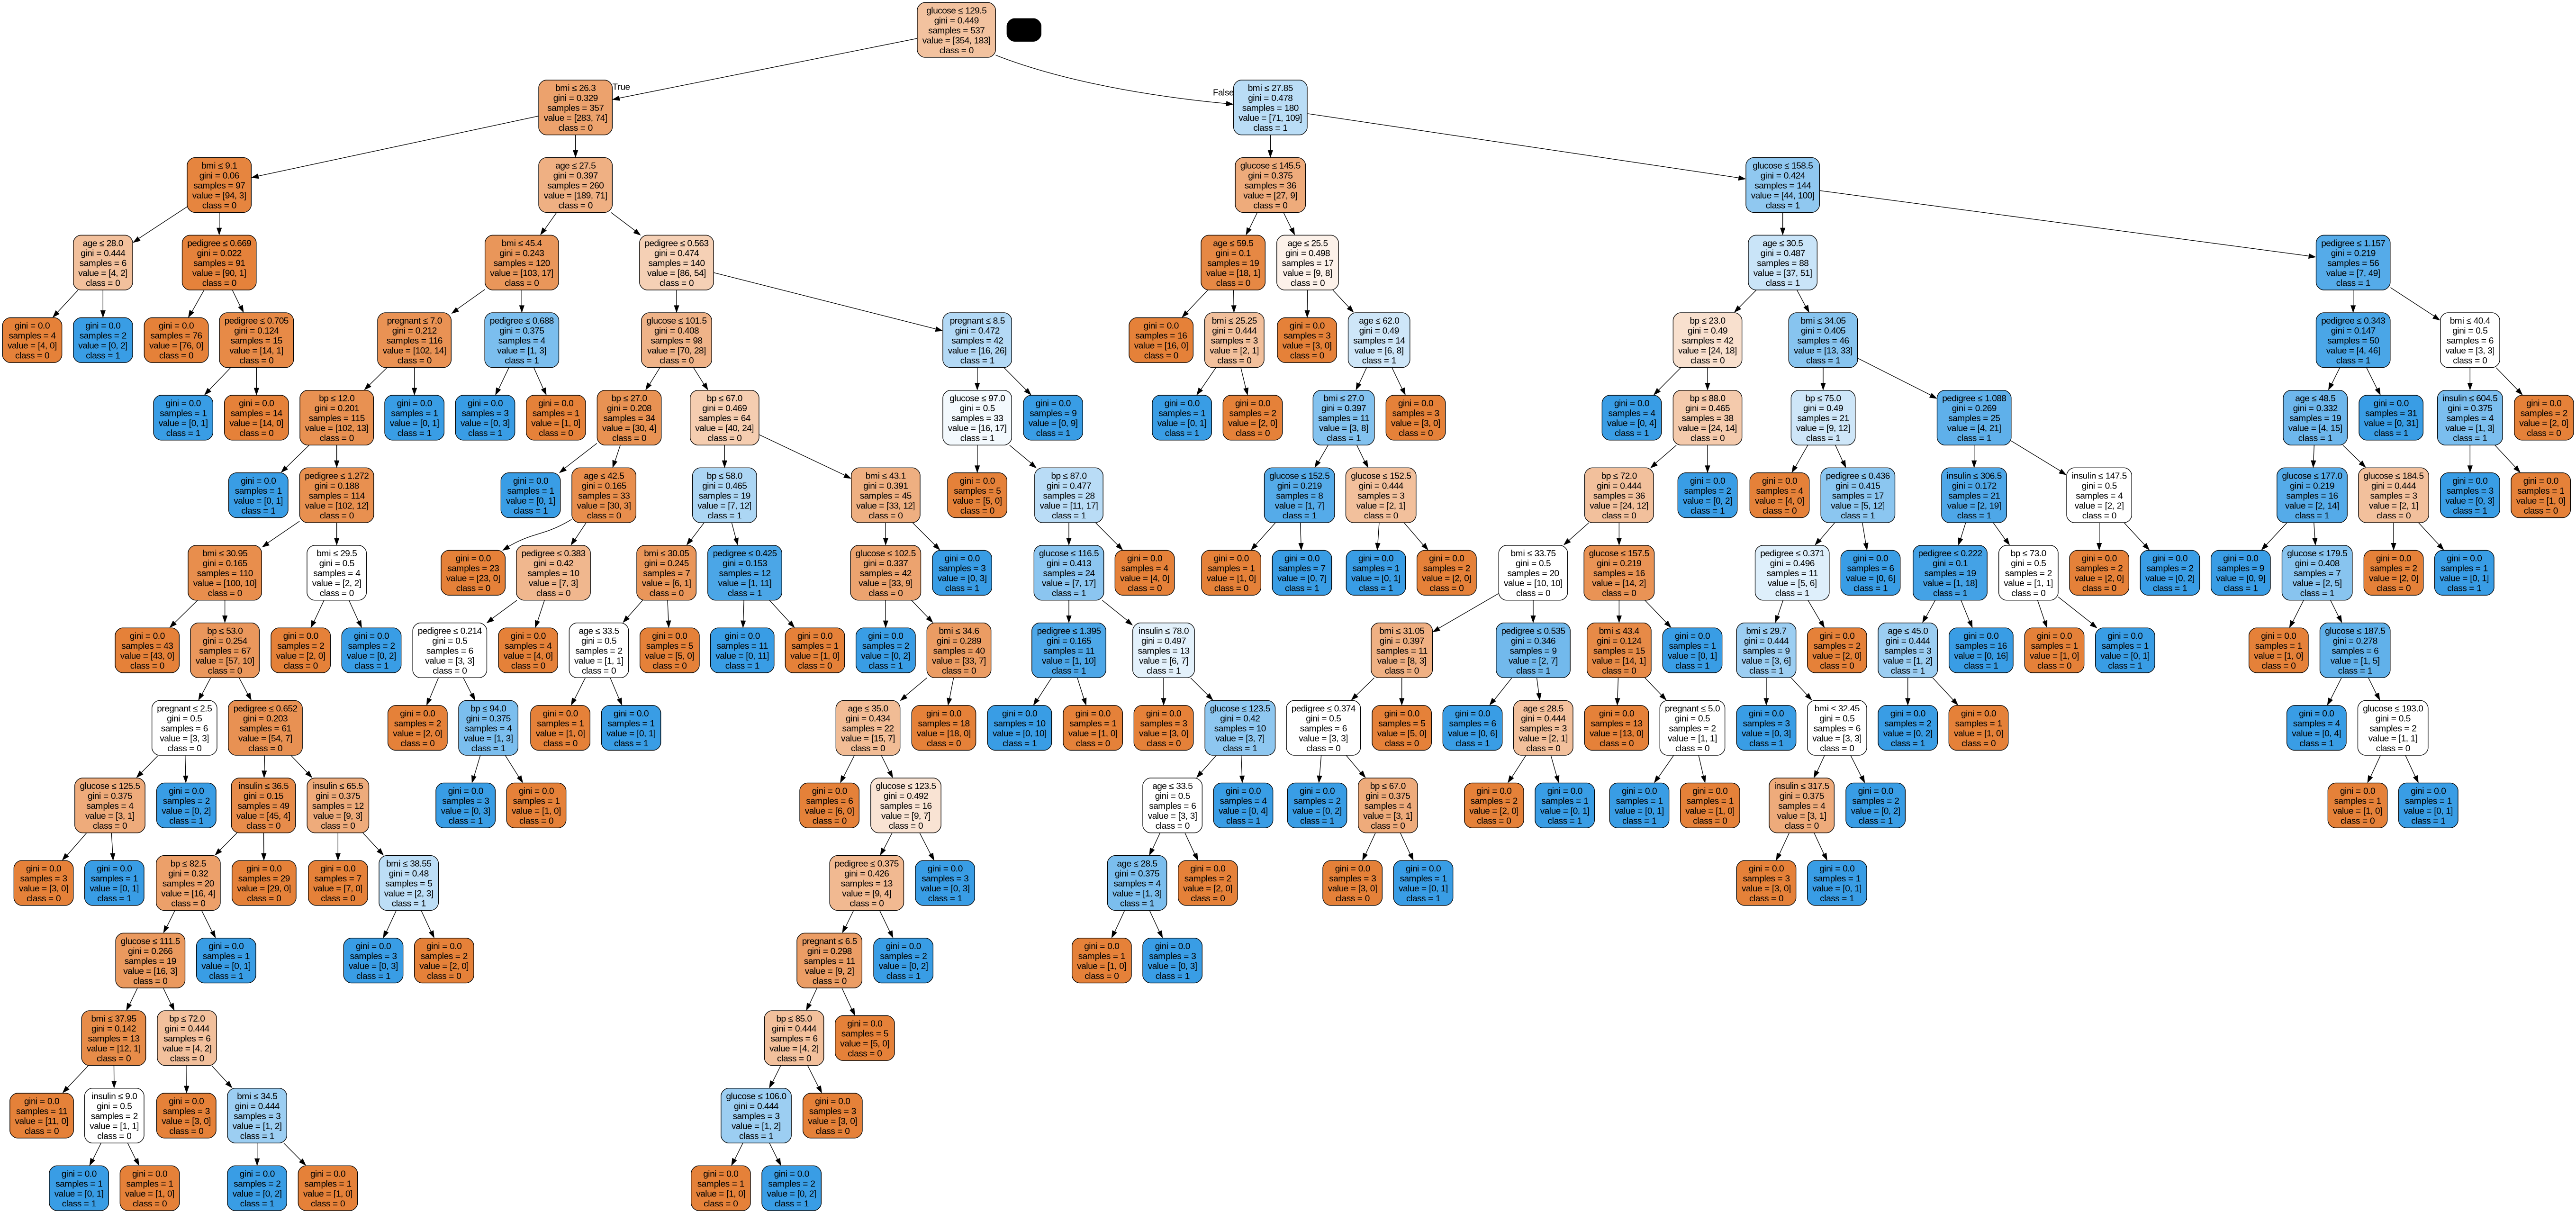

In [26]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_gini.png')
Image(graph.create_png())
     

In [27]:
#criando um dicionário com as variáveis
dic = {'score':clf.feature_importances_,'features':X_train.columns}
#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df
     

,score,features
4,0.306003,glucose
2,0.210685,bmi
5,0.146797,bp
6,0.130143,pedigree
3,0.123382,age
1,0.049872,insulin
0,0.033118,pregnant


In [28]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Treino
clf = clf.fit(X_train,y_train)

#Teste
y_pred = clf.predict(X_test)


print("Acurácia:",metrics.accuracy_score(y_test, y_pred))

Acurácia: 0.7705627705627706


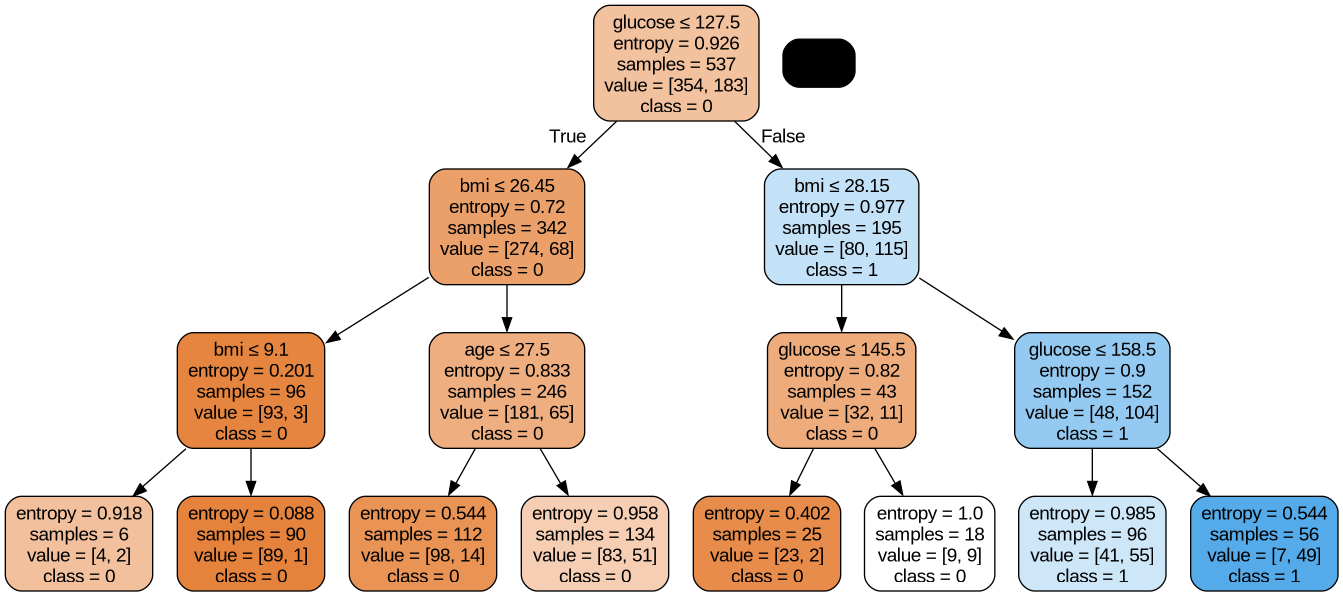

In [29]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes_entropia.png')
Image(graph.create_png())

In [30]:
#criando um dicionário com as variáveis
dic = {'score':clf.feature_importances_,'features':X_train.columns}
#criando um dataframe com os dados
df = pd.DataFrame(dic).sort_values('score',ascending=False)
df
     

,score,features
4,0.562837,glucose
2,0.326594,bmi
3,0.110569,age
0,0.000000,pregnant
1,0.000000,insulin
5,0.000000,bp
6,0.000000,pedigree
